## Computational scaling of SVMs
1. Write a python function from which you can generate synthetic datasets of an arbitrary size (e.g. a mixture model of two Gaussians)
2. By training SVMs on datasets of different sizes show:
    1. how the training time scales.
    2. how the classification time scales (on a sample of 1000 unseen datapoints).
    3. the accuracy of the classifier (on a sample of 1000 unseen datapoints).

Choose a kernel that you think is appropriate to the task at hand. Come to class with your code and results in a plaintext format suitable for pasting into a poll.


In [9]:
## SETUP
import numpy as np
import pandas as pd
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
 
%matplotlib inline
plt.style.use('ggplot')
np.random.seed(123)

### Generating Sample Data

array([[-0.90866497,  3.74602189],
       [ 2.51164328,  4.40911247],
       [-1.81897348, -0.66020703],
       ..., 
       [ 2.8864119 , -0.07236874],
       [ 1.16590762,  0.52648334],
       [-0.69105191, -0.569482  ]])

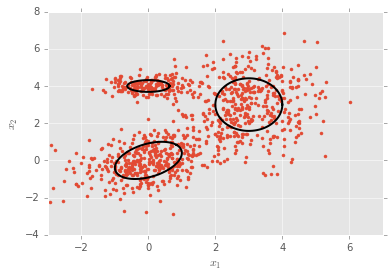

In [19]:
## Using pypr to generate a Mixture of Gaussians
## adapted from http://pypr.sourceforge.net/mog.html 
from pypr.clustering import *
from numpy import *
from matplotlib.pylab import *
import pypr.clustering.gmm as gmm

def mixgaus(n_samples, plotit=True):
    centroids=[array([10,10])]
    ccov=[array([[1,0],[0,1]])]
    samples = 10
    gmm.sample_gaussian_mixture(centroids, ccov, samples=samples)

    # Drawing samples from a Gaussian Mixture Model
    # Mixing coefficients
    mc = [0.4, 0.4, 0.2] 
    # Centers / Means of the clusters
    centroids = [ array([0,0]), array([3,3]), array([0,4]) ]
    # Covariance matrices
    ccov = [ array([[1,0.4],[0.4,1]]), diag((1,2)), diag((0.4,0.1)) ]

    # Generating the sampled Gaussian Mixture from this data
    X = gmm.sample_gaussian_mixture(centroids, ccov, mc, samples=n_samples)

    if plotit == True:
        plot(X[:,0], X[:,1], '.')
        for i in range(len(mc)):
            x1, x2 = gmm.gauss_ellipse_2d(centroids[i], ccov[i])
            plot(x1, x2, 'k', linewidth=2)
        xlabel('$x_1$'); ylabel('$x_2$')
    return X

mixgaus(1000, plotit=True)

#this might be good: /http://yulearning.blogspot.com/2014/11/einsteins-most-famous-equation-is-emc2.html

In [71]:
import numpy as np
def simple_sample(N=1000):
    mean1, mean2, std1, std2 = 1, 5, 2, 3
    x0 = np.random.normal(loc=[mean1, mean2], scale=[std1, std2], size=(N, 2))
    mean3, mean4, std3, std4 = 2, -2, 1, 0.1
    x1 = np.random.normal(loc=[mean3, mean4], scale=[std3, std4], size=(N, 2))
    y0 = [0]*N
    y1 = [1]*N
    X = np.append(x0,x1)
    y = np.append(y0,y1)
    return X,y
simple_sample(1000)

(array([ 0.19986108,  9.35963837,  2.83436937, ..., -2.01798343,
         3.65879782, -1.98711101]), array([0, 0, 0, ..., 1, 1, 1]))

In [79]:
### USING: from sklearn.datasets.samples_generator import make_blobs
### https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
# Generate some data   
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=2,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

In [81]:
from sklearn import svm
#X = [[0, 0], [1, 1]]
#y = [0, 1]
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X, y_true)  
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

NameError: name 'SVC' is not defined

2. By training SVMs on datasets of different sizes show:
    1. how the training time scales.
    2. how the classification time scales (on a sample of 1000 unseen datapoints).
    3. the accuracy of the classifier (on a sample of 1000 unseen datapoints).

In [88]:
import time
from sklearn import svm
X, y_true = make_blobs(n_samples=1500, centers=2,
                       cluster_std=0.60, random_state=0)
split = 1000
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

def predict_svm(N):
    start_time = time.time()
    clf = svm.LinearSVC(class_weight='balanced')
    clf.fit(X[:100], y_true[:100])
    predictedLabels = clf.predict(X[100:])
    score = clf.score(X_test, y_test)
    end_time = time.time()
    runtime = end_time-start_time
    return runtime, score

In [90]:
#stan
classification_times = []
for i in range(500,3000):
    num_samples = i
    X1 = clf.sample(num_samples)[0]
    y1 = clf.sample(num_samples)[1]
    model = svm.SVC(kernel='linear', C=1.0)
    start = time.time()
    model.fit(X1, y1)
    end = time.time()
    classification_times.append(end - start)
plt.plot(classification_times)
plt.show()

AttributeError: 'LinearSVC' object has no attribute 'sample'

In [91]:
#Michael
svc = svm.SVC()
testX, testy = generate_data(1000)
ns = np.logspace(1, 4.25)

training_time = []
classification_time = []
accuracy = []

for n in tqdm(ns):
    X, y = generate_data(int(n))
    t = timeit.Timer("svc.fit(X, y)", "from __main__ import svc, X, y")
    training_time.append(t.timeit(3) / 3)

NameError: name 'generate_data' is not defined

In [ ]:
#Guillaume
N_range = np.linspace(1000, 500000, 10)

TIMES = []

for N in tqdm_notebook(N_range):
    samples = generate_samples(int(N))
    XX = samples[:,1].reshape(-1, 1)
    YY = samples[:,0]
    start_time = time.time()
    model.fit(XX, YY)
    TIMES.append(time.time() - start_time)


In [ ]:
#Guy

for data_size in DATA_SIZES:
    svm = SVC()
    X_train, y_train, X_test, y_test = generate_train_test_blobs(data_size)
    def fit_function():
        return svm.fit(X_train, y_train)
    train_time, train_result = timeit.timeit(fit_function, number=3)
    results[data_size]['train_time'] = train_time

In [ ]:
# Ray 
Sizes = [100,1000,10000,100000]
Time_train = []
Time_classify = []
for n in Sizes:
    X,y = MakeData(n)
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=1)    
    start = timeit.default_timer()
    clf.fit(X_train,y_train)
    stop = timeit.default_timer()    
    Time_train.append(stop-start)   
    start = timeit.default_timer()
    y_val_hat = clf.predict(X_train)
    stop = timeit.default_timer()    
    Time_classify.append(stop-start)
Time seemed to increase linearly by the same factor as my sample size, but from 10^4 to 10^5 it seemed more like n^2